# Amazon-top-50-bestselling-books-2009-2019

This dataset contains information about top 50 bestselling books which are available on "amzon" for the period of year 2009 to 2019. This dataset includes information about title of book, author of book, genre of book, user ratings and number of reviews on book, price of books in dollars and year in which that book was in bestseller list. I will be using Python libraries like NumPy, Pandas, Matplotlib, Seaborn to draw some insights from the dataset. This is the final submission for the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com). This course helped me a lot in enhancing my programming skills in Python. This course covers all the topics required for exploratory data analytics in Python and covers topics gradually over a period of time.

## Downloading the Dataset

I have downloaded the dataset "amazon-top-50-bestselling-books-2009-2019" from kaggle using opendatasets library. While downloading dataset your kaggle user name and API key is required.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019' 

Dataset was downloaded earlier and all the following steps were executed without any error. But this code block started giving error again on running.

In [3]:
import opendatasets as od
try:
    od.download('https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019')
except:
    print("dataset was downloaded earlier")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ankitsavita
Your Kaggle Key: ········
dataset was downloaded earlier


The dataset has been downloaded and extracted.

In [4]:
data_dir = './amazon-top-50-bestselling-books-2009-2019'

In [5]:
import os
os.listdir(data_dir)

['bestsellers with categories.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "amazon-top-50-bestselling-books-2009-2019"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ankitsavita144/amazon-top-50-bestselling-books-2009-2019" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/ankitsavita144/amazon-top-50-bestselling-books-2009-2019


'https://jovian.ai/ankitsavita144/amazon-top-50-bestselling-books-2009-2019'

## Data Preparation and Cleaning

Let's load the CSV file and we will use "read_csv" method of Pandas library. We will use name "raw_df" for CSV file.  So we have to import Pandas library in the notebook. Along with Pandas we will also import NumPy library which can be very useful while dealing with multidimensional arrays.



In [10]:
import numpy as np
import pandas as pd

In [11]:
raw_df = pd.read_csv("amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv")

We can see what is inside the our dataframe. We will use "columns" method of Pandas library to know the name of columns of our dataframe. Then we will use "info" method of Pandas library to know about count of null values in the dataframe and this method also gives information about data types of all the columns. 

In [12]:
raw_df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [13]:
raw_df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [14]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


It seems that all the entries are present in the dataframe with 0 null values in all the columns. Data types of all the columns as per requirement except one column that is "Year". We have to change data type of "Year" column from 'int64' to 'datetime64'.

It seems that we have committed mistake while changing data type. Next, we will try different code to change again data type of "Year" column into desired format. Since only year was mentioned in dataframe we have assumed month and day for that year as 1 January.

In [15]:
raw_df.Year = pd.to_datetime(raw_df.Year, format='%Y')

In [16]:
## Checking modified dataframe.
raw_df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016-01-01,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011-01-01,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018-01-01,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017-01-01,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019-01-01,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019-01-01,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016-01-01,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017-01-01,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018-01-01,Non Fiction


In [17]:
## Checking data type of all the columns.
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         550 non-null    object        
 1   Author       550 non-null    object        
 2   User Rating  550 non-null    float64       
 3   Reviews      550 non-null    int64         
 4   Price        550 non-null    int64         
 5   Year         550 non-null    datetime64[ns]
 6   Genre        550 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 30.2+ KB


Next we will see descriptive statistical analysis of the dataframe. We will use "describe" method of Pandas library for this purpose. The result obtained from this method will help to locate out incorrect values present in the dataframe.

In [18]:
raw_df.describe()

,User Rating,Reviews,Price
count,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000
std,0.226980,11731.132017,10.842262
min,3.300000,37.000000,0.000000
25%,4.500000,4058.000000,7.000000
50%,4.700000,8580.000000,11.000000
75%,4.800000,17253.250000,16.000000
max,4.900000,87841.000000,105.000000


It seems that values inside "User Rating" and "Reviews" columns are upto mark but when you will observe that minimum value in the "Price" column is 0. This seems rather odd value for price of a book. This seems to be either a data entry error or amazon have distributed those books for free. Well former seems more correct rather than latter one. 

Next we will see for which books price is mentioned as 0.

In [19]:
raw_df_new = raw_df[raw_df['Price'] == 0]

In [20]:
raw_df_new

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011-01-01,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013-01-01,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014-01-01,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014-01-01,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014-01-01,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016-01-01,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017-01-01,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010-01-01,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013-01-01,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014-01-01,Fiction


In [21]:
raw_df_new.count()

Name           12
Author         12
User Rating    12
Reviews        12
Price          12
Year           12
Genre          12
dtype: int64

Now we have to deal with these erroneous entries. We can adopt one the following steps to deal with these problems:
1. By deleting all the rows with price listed as 0.
2. By inserting price of these books one by one but we have to look for price for these books online. 

Since data is very limited and we have only 550 rows and 12 of them has "Price" attribute as 0. We cannot go for first option as it will result in losing valuable information which will be necessary for further analysis. It will not be tedious to substitute price for these 12 entries. I will be taking help of https://www.amazon.com for checking of the price of above mentioned books.

I have searched for price for above mentioned books with price as 0 on amazon.com. There are certain things which I have realized while looking for prices - 
1. Price of books are of current date.
2. Price of a book varies on the basis of binding: paperback, hardcover etc.
3. Price of new books is way more then used once.

Now to overcome these defects I have decided following parameters:
1. I will balance price for required date by using inflation calculator online. I will be using      https://www.usinflationcalculator.com .
2. I have tried looking for price of the books which have a value in the "Price" column and found some useful insights:
    a. Price of the books mentioned is approximately equal to the paperback edition.
    b. All the books are new.
   Thus it will solve 2 and 3 point of our concern. 
   

Next I have created a dictionary which contains keys as index numbers of books with their price as 0 and their current price on "17 April 2020" on amazon.com as the values in dictionary. After that I have also created another dictionary in which I have mentioned value is adjusted price for inflation for that particular year.

In [22]:
inflated_price_dict = {42:5, 71:16.09, 116:9.78, 193:6.08, 219:6.12, 358:3.55, 381:10.28, 461:8.83, 505:6.57, 506:6.57, 507:6.57, 508:6.57}

In [23]:
inflated_price_dict

{42: 5,
 71: 16.09,
 116: 9.78,
 193: 6.08,
 219: 6.12,
 358: 3.55,
 381: 10.28,
 461: 8.83,
 505: 6.57,
 506: 6.57,
 507: 6.57,
 508: 6.57}

In [24]:
## Adjusted for inflation.
new_price_dict = {42:[4.25], 71:[14.15], 116:[8.74], 193:[5.43], 219:[5.47], 358:[3.22], 381:[9.51], 461:[7.27], 505:[5.78], 506:[5.87], 507:[5.88], 508:[5.95]}

In [25]:
new_price_dict

{42: [4.25],
 71: [14.15],
 116: [8.74],
 193: [5.43],
 219: [5.47],
 358: [3.22],
 381: [9.51],
 461: [7.27],
 505: [5.78],
 506: [5.87],
 507: [5.88],
 508: [5.95]}

In [26]:
adjusted_df = pd.DataFrame.from_dict(new_price_dict)

In [27]:
adjusted_df

,42,71,116,193,219,358,381,461,505,506,507,508
0,4.25,14.15,8.74,5.43,5.47,3.22,9.51,7.27,5.78,5.87,5.88,5.95


In [28]:
adjusted_df1 = adjusted_df.transpose()

In [29]:
adjusted_df1

,0
42,4.25
71,14.15
116,8.74
193,5.43
219,5.47
358,3.22
381,9.51
461,7.27
505,5.78
506,5.87


In [30]:
## Rename of column as "Price" by using "rename" method.
adjusted_df1.rename(columns = {0:'Price'}, inplace = True)

In [31]:
adjusted_df1

,Price
42,4.25
71,14.15
116,8.74
193,5.43
219,5.47
358,3.22
381,9.51
461,7.27
505,5.78
506,5.87


In [32]:
adjusted_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 42 to 508
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   12 non-null     float64
dtypes: float64(1)
memory usage: 492.0 bytes


Data type of new dataframe is "float" but we need to change it as "int" because data type of "Price" in our original CSV file is integer only. So we will use "apply" method for this purpose.

In [33]:
adjusted_df1['Price'] = adjusted_df1['Price'].apply(np.int64)

In [34]:
adjusted_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 42 to 508
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   12 non-null     int64
dtypes: int64(1)
memory usage: 492.0 bytes


In [35]:
adjusted_df1

,Price
42,4
71,14
116,8
193,5
219,5
358,3
381,9
461,7
505,5
506,5


Next we will try to insert above mentioned price in our original dataframe to eliminate the data entry error. We will create a copy of our original dataframe first. After trying many codes and failing again and again for replacing values in the dataframe, I just added price manually with the help of "loc" method.

In [36]:
books_df = raw_df.copy()

In [37]:
books_df.loc[books_df.index == 42, "Price"] = 4
books_df.loc[books_df.index == 71, "Price"] = 14
books_df.loc[books_df.index == 116, "Price"] = 8
books_df.loc[books_df.index == 193, "Price"] = 5
books_df.loc[books_df.index == 219, "Price"] = 5
books_df.loc[books_df.index == 358, "Price"] = 3
books_df.loc[books_df.index == 381, "Price"] = 9
books_df.loc[books_df.index == 461, "Price"] = 7
books_df.loc[books_df.index == 505, "Price"] = 5
books_df.loc[books_df.index == 506, "Price"] = 5
books_df.loc[books_df.index == 507, "Price"] = 5
books_df.loc[books_df.index == 508, "Price"] = 5

In [38]:
books_df.describe()

,User Rating,Reviews,Price
count,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.236364
std,0.226980,11731.132017,10.723149
min,3.300000,37.000000,1.000000
25%,4.500000,4058.000000,7.000000
50%,4.700000,8580.000000,11.000000
75%,4.800000,17253.250000,16.000000
max,4.900000,87841.000000,105.000000


In [39]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         550 non-null    object        
 1   Author       550 non-null    object        
 2   User Rating  550 non-null    float64       
 3   Reviews      550 non-null    int64         
 4   Price        550 non-null    int64         
 5   Year         550 non-null    datetime64[ns]
 6   Genre        550 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 30.2+ KB


As you can see from the output obtained from above two cells that minimum value in "Price" column is now 1 which is a valid value. Our dataset is fully cleaned, it has required data type for all columns, it does not contain any missing value and any other anomalies. Our data is prepared for further analysis.

In [40]:
import jovian

In [41]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ankitsavita144/amazon-top-50-bestselling-books-2009-2019" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/ankitsavita144/amazon-top-50-bestselling-books-2009-2019


'https://jovian.ai/ankitsavita144/amazon-top-50-bestselling-books-2009-2019'

## Exploratory Analysis and Visualization

In this following section we will analyse the cleaned data with the help of statistics and graphs. We will draw various charts to draw some useful insights from the data.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [42]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Before analysing let us sort the dataframe on the basis of the year.

In [43]:
books_df1 = books_df.sort_values("Year")

In [44]:
books_df1

,Name,Author,User Rating,Reviews,Price,Year,Genre
177,"I, Alex Cross",James Patterson,4.6,1320,7,2009-01-01,Fiction
131,Glenn Beck's Common Sense: The Case Against an...,Glenn Beck,4.6,1365,11,2009-01-01,Non Fiction
417,The Last Lecture,Randy Pausch,4.7,4028,9,2009-01-01,Non Fiction
241,New Moon (The Twilight Saga),Stephenie Meyer,4.6,5680,10,2009-01-01,Fiction
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009-01-01,Fiction
...,...,...,...,...,...,...,...
150,Guts,Raina Telgemeier,4.8,5476,7,2019-01-01,Non Fiction
466,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.6,26490,15,2019-01-01,Non Fiction
462,The Silent Patient,Alex Michaelides,4.5,27536,14,2019-01-01,Fiction
130,"Girl, Wash Your Face: Stop Believing the Lies ...",Rachel Hollis,4.6,22288,12,2019-01-01,Non Fiction


It is good to have statistical information about the dataframe. Next we will use "describe" method which will give information of descriptive statistics of the n dataframe.

In [45]:
books_df1.describe()

,User Rating,Reviews,Price
count,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.236364
std,0.226980,11731.132017,10.723149
min,3.300000,37.000000,1.000000
25%,4.500000,4058.000000,7.000000
50%,4.700000,8580.000000,11.000000
75%,4.800000,17253.250000,16.000000
max,4.900000,87841.000000,105.000000


By looking into descriptive statistical data we can infer following things :
1. There are 550 number of books in the bestseller list of amazon from year 2009 to 2019.
2. Highest rating given by users to a book is 4.9 and the lowest is 3.3.
3. Highest number of reviews given by users to a book are 87841 and the lowest are 37.
4. Price of the most expensive book in this list is 105 dollar and the cheapest book is of 1 dollar.

In the next section we will try to figure out more answers to questions.

We will try to figure out what kind of relationship exists between number of reviews on a book and it's user rating. We will take help of scatter plot to visualize this relationship. We will also consider genre of the books as well.

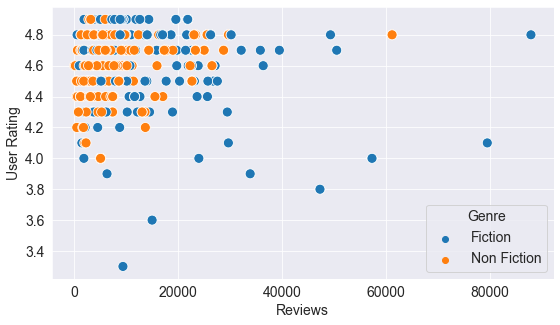

In [46]:
sns.scatterplot(x=books_df1.Reviews, y=books_df1['User Rating'], hue=books_df1.Genre, s=100);

We can conclude following points by looking the scatter plot :
1. Number of reviews for fictional books are more than the number of reviews for non fictional books.
2. For a large number of books lower number reviews lead to high user ratings.
3. User ratings of non fictional books are higher than most of the fictional books. Even a non fiction book with about 60000 reviews has user ratings as 4.8.

Next we will try to figure out realtionship between number of reviews and price of books.  We will take help of scatter plot to visualize this relationship. We will also consider genre of the books as well.

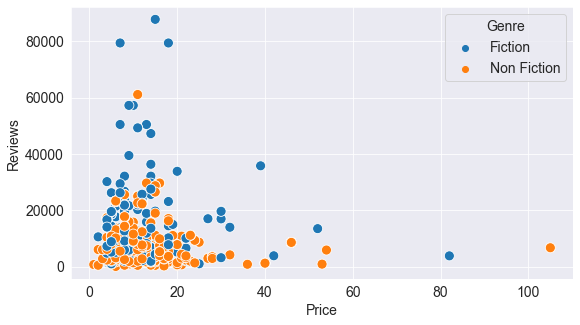

In [47]:
sns.scatterplot(x=books_df1.Price, y=books_df1.Reviews, hue=books_df1.Genre, s=100);

We can conclude following points by looking the scatter plot :
1. Cheaper books tend to have high number of reviews. Reason for this may be because more people can buy cheap books.
2. Buyers of fiction likely to give more reviews as compared to buyers who bought non fiction. 

Next we will try to draw frequency distribution of user ratings and we know that histogram is best for this purpose. We will use multiple histogram for this purpose because with it's help we can differentiate genre of books.

In [48]:
fiction_df = books_df1[books_df1.Genre == 'Fiction']
non_fiction_df = books_df1[books_df1.Genre == 'Non Fiction']

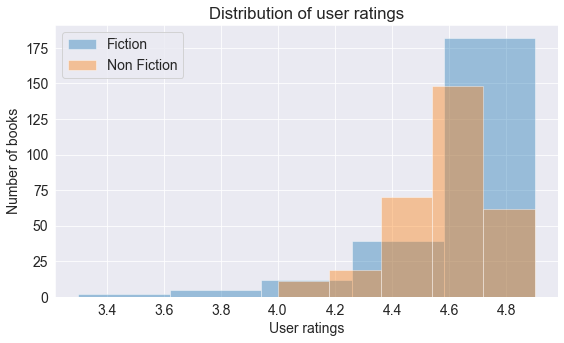

In [49]:
plt.title("Distribution of user ratings")
plt.hist(fiction_df['User Rating'], alpha=0.4, bins=5);
plt.hist(non_fiction_df['User Rating'], alpha=0.4, bins=5);
plt.legend(['Fiction','Non Fiction'])
plt.xlabel("User ratings")
plt.ylabel("Number of books");

We can conclude following points by looking into the histogram:
1. Number of fiction books with user ratings 4.6 and above is way larger than non fiction ones. 
2. There is no non fiction book with user ratings less than 4.0.
3. Most of the non fiction books have user ratings between 4.6 and 4.7.
4. There is equal number of fiction books with user ratings between 4.6 to 4.7 and 4.7 to 4.8.
5. This graph obtained is left skewed.

Next we will try to draw frequency distribution of price of books' genre and we know that histogram is best for this purpose. We will use multiple histogram for this purpose because with it's help we can differentiate genre of books.

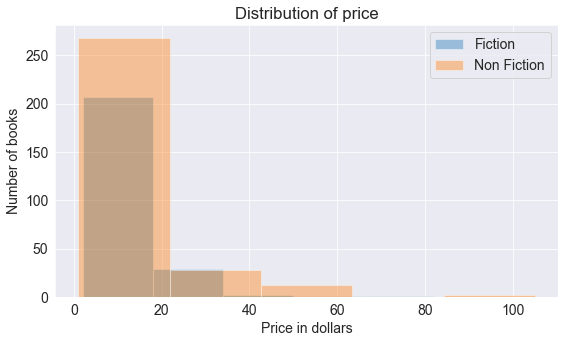

In [50]:
plt.title("Distribution of price")
plt.hist(fiction_df.Price, alpha=0.4, bins=5);
plt.hist(non_fiction_df.Price, alpha=0.4, bins=5);
plt.legend(['Fiction','Non Fiction'])
plt.xlabel("Price in dollars")
plt.ylabel("Number of books");

We can conclude following points by looking into the histogram:
1. Price of the most of the bestseller books regardless of their genre is lesser than $40.
2. Generally fiction books are cheaper than the non fiction ones.
3. Price of some non fiction books is more than that of fiction ones.
4. The graph obtained is right skewed.

Next we will try to draw frequency distribution of review count of books' genre and we know that histogram is best for this purpose. We will use multiple histogram for this purpose because with it's help we can differentiate genre of books.

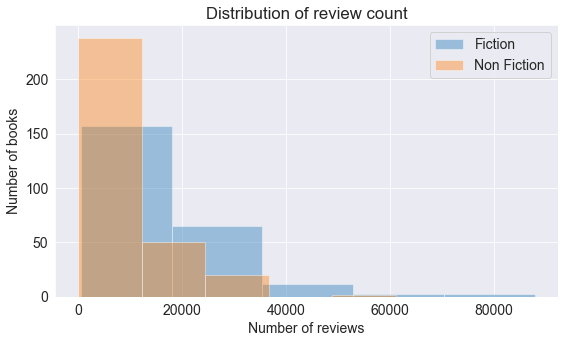

In [51]:
plt.title("Distribution of review count")
plt.hist(fiction_df.Reviews, alpha=0.4, bins=5);
plt.hist(non_fiction_df.Reviews, alpha=0.4, bins=5);
plt.legend(['Fiction','Non Fiction'])
plt.xlabel("Number of reviews")
plt.ylabel("Number of books");

We can conclude following points by looking into the histogram:
1. Most of the non fiction books have lesser reviews than fiction books.
2. The graph obtained is right skewed.
3. Most of the books have less than 40000 reviews.

Let us save and upload our work to Jovian before continuing

In [52]:
import jovian

In [53]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ankitsavita144/amazon-top-50-bestselling-books-2009-2019" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/ankitsavita144/amazon-top-50-bestselling-books-2009-2019


'https://jovian.ai/ankitsavita144/amazon-top-50-bestselling-books-2009-2019'

## Asking and Answering Questions

In the following section we will try to answer some of the questions which may arise in your mind while working or looking in this dataset.



#### Q1: What are the top 10 most expensive books in amazon's bestseller list ?

In [54]:
expensive_books_df = books_df.sort_values("Price", ascending = False).head(10)

In [55]:
expensive_books_df

,Name,Author,User Rating,Reviews,Price,Year,Genre
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014-01-01,Non Fiction
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013-01-01,Non Fiction
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009-01-01,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016-01-01,Non Fiction
346,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53,2009-01-01,Non Fiction
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016-01-01,Fiction
280,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2018-01-01,Non Fiction
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009-01-01,Non Fiction
272,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010-01-01,Non Fiction
273,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011-01-01,Non Fiction


In [56]:
expensive_books_df.iloc[0]

Name           Diagnostic and Statistical Manual of Mental Di...
Author                          American Psychiatric Association
User Rating                                                  4.5
Reviews                                                     6679
Price                                                        105
Year                                         2014-01-01 00:00:00
Genre                                                Non Fiction
Name: 70, dtype: object

In [57]:
expensive_books_df.nunique()

Name           6
Author         6
User Rating    4
Reviews        6
Price          6
Year           7
Genre          2
dtype: int64

In [58]:
## descriptive statistics of the top 10 most exensive books.
expensive_books_df.describe()

,User Rating,Reviews,Price
count,10.000000,10.000000,10.000000
mean,4.610000,7167.500000,63.500000
std,0.152388,3350.396569,24.368696
min,4.500000,858.000000,46.000000
25%,4.500000,6070.000000,46.000000
50%,4.500000,7629.500000,52.500000
75%,4.700000,8580.000000,75.000000
max,4.900000,13471.000000,105.000000


In [59]:
expensive_books_df.value_counts("Genre")

Genre
Non Fiction    8
Fiction        2
dtype: int64

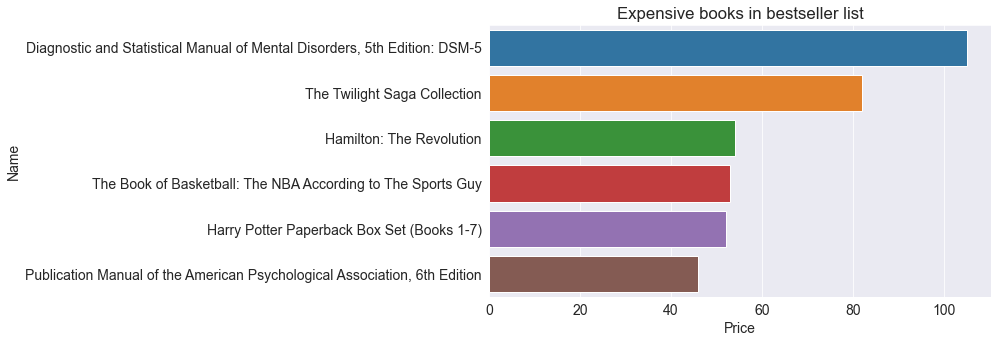

In [60]:
plt.title('Expensive books in bestseller list')
sns.barplot(y=expensive_books_df.Name, x=expensive_books_df.Price);

We can conclude following things :
1. There are 6 unique books in the top 10 most expensive books in this bestseller list.
2. All 6 books have different authors.
3. 2 entries in the above mentioned list are not books but booksets, i.e. The Twilight Saga Collection and Harry Potter Paperback Box Set (Books 1-7).
4. There are only 2 entries which are of fiction genre in this list and rest are non fiction ones.
5. Most expensive book in the whole dataset is  Diagnostic and Statistical Manual of Mental Disorder and it's price is 105 dollars.

#### Q2: What are the top 10 cheapest books in amazon's bestseller list ?

In [61]:
cheap_books_df = books_df.sort_values("Price").head(10)

In [62]:
cheap_books_df

,Name,Author,User Rating,Reviews,Price,Year,Genre
91,Eat This Not That! Supermarket Survival Guide:...,David Zinczenko,4.5,720,1,2009-01-01,Non Fiction
264,Percy Jackson and the Olympians Paperback Boxe...,Rick Riordan,4.8,548,2,2010-01-01,Fiction
388,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,10559,2,2009-01-01,Fiction
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010-01-01,Non Fiction
389,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,10559,2,2010-01-01,Fiction
103,Fear: Trump in the White House,Bob Woodward,4.4,6042,2,2018-01-01,Non Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018-01-01,Non Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,3,2016-01-01,Non Fiction
205,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2014-01-01,Non Fiction
179,If Animals Kissed Good Night,Ann Whitford Paul,4.8,16643,4,2019-01-01,Fiction


In [63]:
cheap_books_df.nunique()

Name           9
Author         9
User Rating    5
Reviews        9
Price          4
Year           6
Genre          2
dtype: int64

In [64]:
## Cheapest book in the amazon's bestseller list from year 2009 to 2019.

cheap_books_df.iloc[0]

Name           Eat This Not That! Supermarket Survival Guide:...
Author                                           David Zinczenko
User Rating                                                  4.5
Reviews                                                      720
Price                                                          1
Year                                         2009-01-01 00:00:00
Genre                                                Non Fiction
Name: 91, dtype: object

In [65]:
## descriptive statistics of the top 10 cheapest books.

cheap_books_df.describe()

,User Rating,Reviews,Price
count,10.000000,10.000000,10.000000
mean,4.590000,5796.100000,2.500000
std,0.172884,5359.778404,0.971825
min,4.400000,460.000000,1.000000
25%,4.425000,1233.500000,2.000000
50%,4.550000,4828.000000,2.000000
75%,4.775000,9429.750000,3.000000
max,4.800000,16643.000000,4.000000


In [66]:
cheap_books_df.value_counts("Genre")

Genre
Non Fiction    6
Fiction        4
dtype: int64

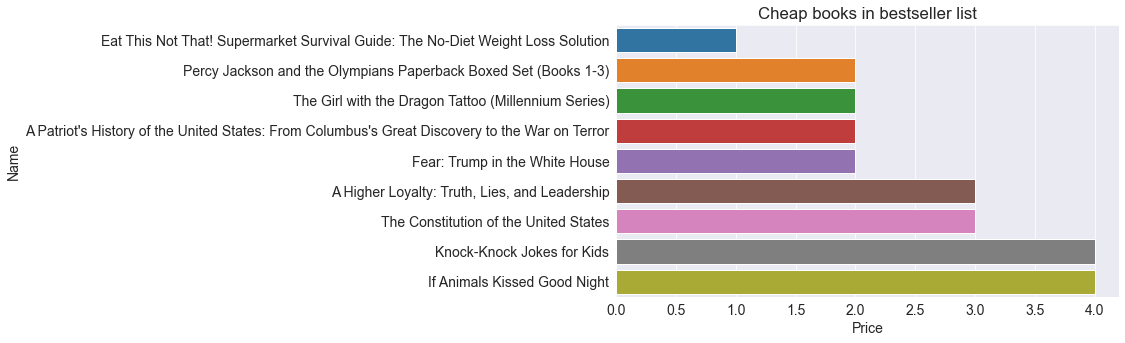

In [67]:
plt.title('Cheap books in bestseller list')
sns.barplot(y=cheap_books_df.Name, x=cheap_books_df.Price);

We can conclude following things:
1. There are 9 unique books in the top 10 cheapest books in this list.
2. All 9 books have different authors.
3. There are 6 books of non fiction genre and 4 of fiction genre in this list.

#### Q3: How many books featured in this bestseller list  and which books are mostly repeated in this list ?

In [68]:
## Total number of different books in the amazon's bestseller list from year 2009 to 2019.

books_df.Name.nunique()

351

In [69]:
## Top 20 most repeated books in the amazon's bestseller list from year 2009 to 2019.

num_books = books_df.Name.value_counts().head(20)
num_books

Publication Manual of the American Psychological Association, 6th Edition                 10
StrengthsFinder 2.0                                                                        9
Oh, the Places You'll Go!                                                                  8
The Very Hungry Caterpillar                                                                7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change               7
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)                  6
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)          6
To Kill a Mockingbird                                                                      5
Giraffes Can't Dance                                                                       5
The Five Dysfunctions of a Team: A Leadership Fable                                        5
How to Win Friends & Influence People                                 

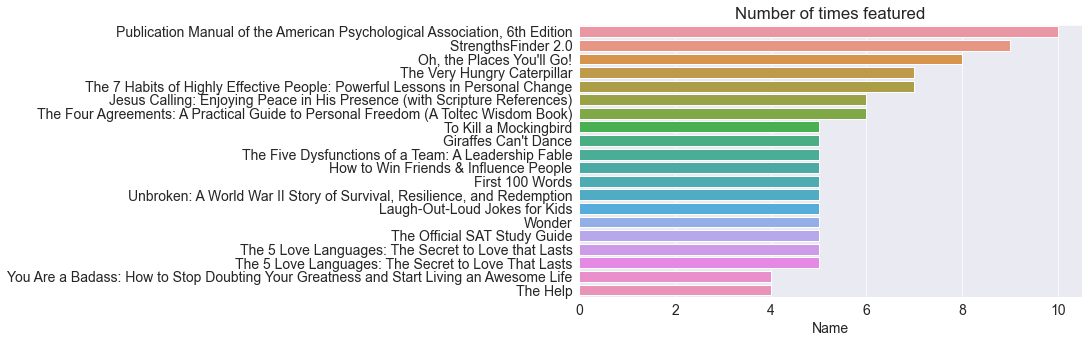

In [70]:
plt.title('Number of times featured')
sns.barplot(y=num_books.index, x=num_books);

We can conclude following things:
1. There are 351 different books in the amazon's bestseller list from year 2009 to 2019.
2. Most of the books are repeated multiple times in this list. The reason for this point can be that the content of these books is so much popular that they multiple copies of them sold every year.

#### Q4: What is genrewise performace of books in the bestseller list ?

In [71]:
genre_count_df = books_df1.groupby("Genre")[['Name']].count()

In [72]:
genre_count_df

,Name
Genre,
Fiction,240
Non Fiction,310


In [73]:
genre_sum_df = books_df1.groupby('Genre')[['Name', 'Author', 'User Rating', 'Reviews', 'Price' ]].sum()

In [74]:
genre_sum_df

,User Rating,Reviews,Price
Genre,,,
Fiction,1115.6,3764110,2676
Non Fiction,1424.5,2810195,4604


In [75]:
genre_mean_df = books_df1.groupby('Genre')[['Name', 'Author', 'User Rating', 'Reviews', 'Price' ]].mean()

In [76]:
genre_mean_df

,User Rating,Reviews,Price
Genre,,,
Fiction,4.648333,15683.791667,11.150000
Non Fiction,4.595161,9065.145161,14.851613


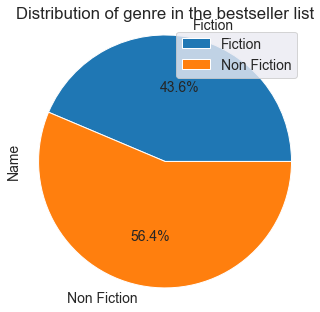

In [77]:
plot = genre_count_df.plot.pie(y='Name', figsize=(5, 5),autopct='%1.1f%%')
plt.title('Distribution of genre in the bestseller list')
plt.axis('equal')
plt.show();

We get following pieces of information while answering this question:
1. There are more non fiction books than fiction books in the amazon's bestseller list from year 2009 to 2019.
2. Mean of user ratings of both fiction and non fiction books is approximately equal, around 4.6.
3. Although fiction books are featured less in this list but sum of reviews on them is much higher than that of non fiction  ones. There can be various reasons for it:
      a. Sales of fiction books can be more than that of non fiction books.
      b. Readers of fiction books can be more active in giving reviews than the readers of non fiction books.
      c. Mean price of fiction books is less than mean price of non fiction ones. This makes them more affordable and hence more people buy fiction books.

#### Q5: What is the yearwise performance of the books featured in bestseller list ?

In [78]:
year_sum_df = books_df1.groupby('Year')[['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Genre']].sum()

In [79]:
year_sum_df

,User Rating,Reviews,Price
Year,,,
2009-01-01,229.2,235506,770
2010-01-01,227.9,273981,681
2011-01-01,227.9,405041,759
2012-01-01,226.6,654546,765
2013-01-01,227.7,654907,749
2014-01-01,231.1,792997,755
2015-01-01,232.4,711669,526
2016-01-01,233.9,709800,667
2017-01-01,233.0,644420,578


In [80]:
year_avg_df = books_df1.groupby('Year')[['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Genre']].mean()

In [81]:
year_avg_df

,User Rating,Reviews,Price
Year,,,
2009-01-01,4.584,4710.12,15.40
2010-01-01,4.558,5479.62,13.62
2011-01-01,4.558,8100.82,15.18
2012-01-01,4.532,13090.92,15.30
2013-01-01,4.554,13098.14,14.98
2014-01-01,4.622,15859.94,15.10
2015-01-01,4.648,14233.38,10.52
2016-01-01,4.678,14196.00,13.34
2017-01-01,4.660,12888.40,11.56


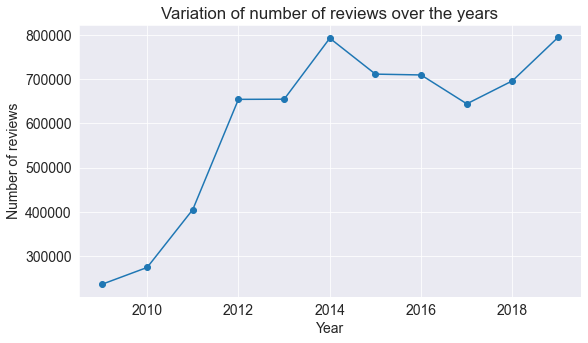

In [82]:
plt.title('Variation of number of reviews over the years')
plt.plot(year_sum_df.index, year_sum_df.Reviews, marker='o')

plt.xlabel('Year')
plt.ylabel('Number of reviews');

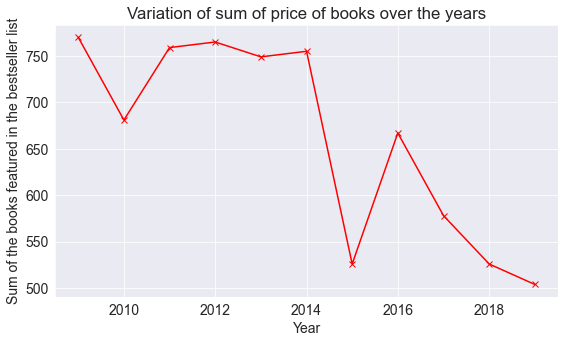

In [83]:
plt.title('Variation of sum of price of books over the years')
plt.plot(year_sum_df.index, year_sum_df.Price, marker='x', c = 'r')

plt.xlabel('Year')
plt.ylabel('Sum of the books featured in the bestseller list');

There are following things that we can conclude from this question's answer:
1. Number of reviews increased at a huge pace after year 2012. The reason for this point may be increased reach of internet to more people.
2. Sum of price of books featured in the bestseller list is generally decreasing over the years.

#### Q6: What are the highest and the lowest rated books in the bestseller list ?

In [84]:
low_df = books_df.sort_values("User Rating").head(10)

In [85]:
low_df

,Name,Author,User Rating,Reviews,Price,Year,Genre
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012-01-01,Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015-01-01,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012-01-01,Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2013-01-01,Fiction
393,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2014-01-01,Fiction
22,Allegiant,Veronica Roth,3.9,6310,13,2013-01-01,Fiction
392,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2013-01-01,Fiction
364,The Elegance of the Hedgehog,Muriel Barbery,4.0,1859,11,2009-01-01,Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014-01-01,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013-01-01,Fiction


In [86]:
low_df.nunique()

Name           7
Author         7
User Rating    5
Reviews        7
Price          8
Year           5
Genre          1
dtype: int64

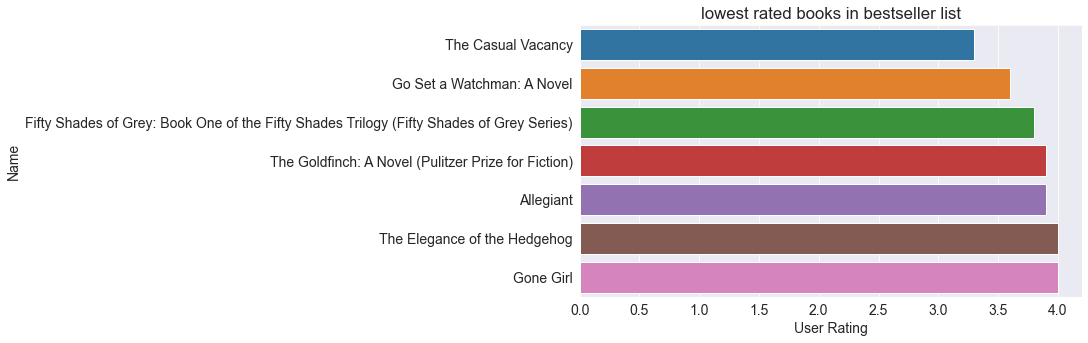

In [87]:
plt.title('lowest rated books in bestseller list')
sns.barplot(y=low_df.Name, x=low_df['User Rating']);

In [88]:
high_df = books_df.sort_values("User Rating").tail(10)

In [89]:
high_df

,Name,Author,User Rating,Reviews,Price,Year,Genre
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019-01-01,Fiction
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015-01-01,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018-01-01,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016-01-01,Non Fiction
174,Humans of New York : Stories,Brandon Stanton,4.9,2812,17,2015-01-01,Non Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019-01-01,Fiction
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017-01-01,Fiction
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014-01-01,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012-01-01,Fiction
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016-01-01,Fiction


In [90]:
high_df.nunique()

Name           7
Author         6
User Rating    1
Reviews        7
Price          6
Year           7
Genre          2
dtype: int64

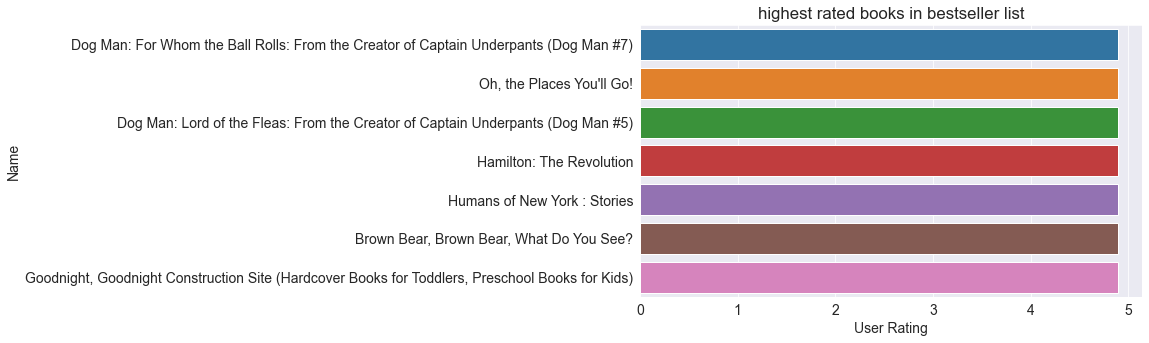

In [91]:
plt.title('highest rated books in bestseller list')
sns.barplot(y=high_df.Name, x=high_df['User Rating']);

We deduced following points while finding answer to above question:
1. Top 10 highly user rated books have same user rating of 4.9.
2. There are 7 different books in the highest rated books and 6 different authors.
3. There are 7 different books in the lowest rated books and 7 different authors.
4. Variation in the lowest rated books is more than that of highest rated books.
5. All the books featured in the lowest rated list are of fiction genre.
6. There are only 2 non fiction books featured in top 10 in the highly user rated list.

#### Q7: What are the highest and the lowest reviewed books in the bestseller list ?

In [92]:
lowest_df = books_df.sort_values("Reviews").head(10)

In [93]:
lowest_df

,Name,Author,User Rating,Reviews,Price,Year,Genre
78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009-01-01,Non Fiction
300,Soul Healing Miracles: Ancient and New Sacred ...,Zhi Gang Sha,4.6,220,17,2013-01-01,Non Fiction
121,George Washington's Sacred Fire,Peter A. Lillback,4.5,408,20,2010-01-01,Non Fiction
512,True Compass: A Memoir,Edward M. Kennedy,4.5,438,15,2009-01-01,Non Fiction
359,The Daily Show with Jon Stewart Presents Earth...,Jon Stewart,4.4,440,11,2010-01-01,Non Fiction
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010-01-01,Non Fiction
39,"Broke: The Plan to Restore Our Trust, Truth an...",Glenn Beck,4.5,471,8,2010-01-01,Non Fiction
27,"Autobiography of Mark Twain, Vol. 1",Mark Twain,4.2,491,14,2010-01-01,Non Fiction
264,Percy Jackson and the Olympians Paperback Boxe...,Rick Riordan,4.8,548,2,2010-01-01,Fiction
31,"Barefoot Contessa, How Easy Is That?: Fabulous...",Ina Garten,4.7,615,21,2010-01-01,Non Fiction


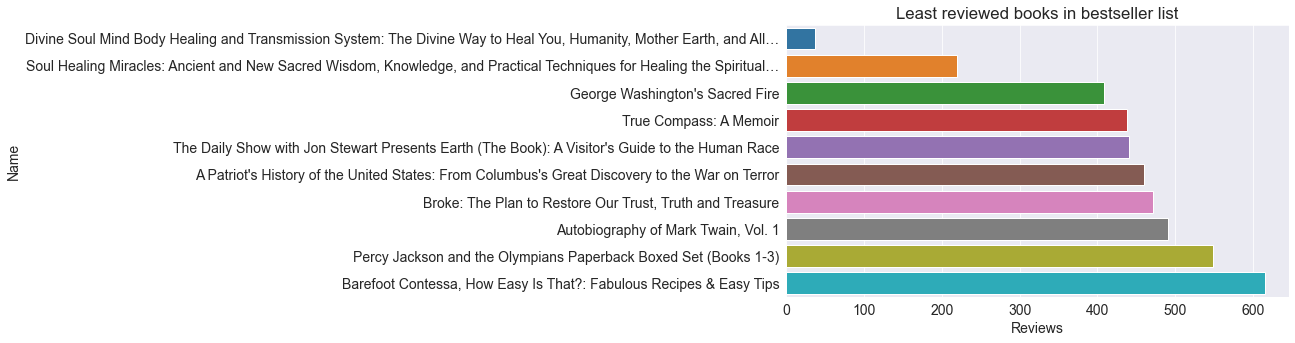

In [94]:
plt.title('Least reviewed books in bestseller list')
sns.barplot(y=lowest_df.Name, x=lowest_df['Reviews']);

In [95]:
highest_df = books_df.sort_values("Reviews").tail(10)

In [96]:
highest_df

,Name,Author,User Rating,Reviews,Price,Year,Genre
367,The Fault in Our Stars,John Green,4.7,50482,7,2014-01-01,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014-01-01,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012-01-01,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013-01-01,Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014-01-01,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018-01-01,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019-01-01,Non Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015-01-01,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016-01-01,Fiction
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019-01-01,Fiction


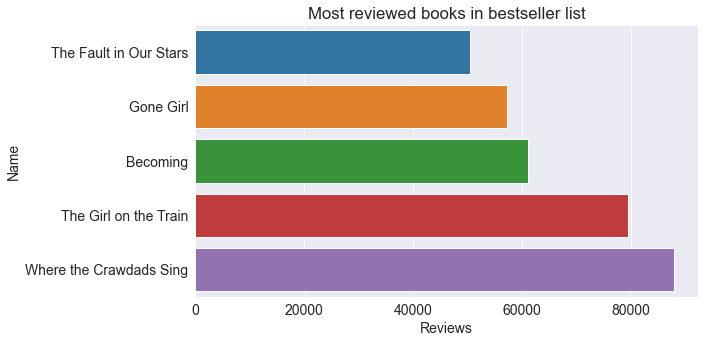

In [97]:
plt.title('Most reviewed books in bestseller list')
sns.barplot(y=highest_df.Name, x=highest_df['Reviews']);

In [127]:
Compare_books_reviews_df = pd.concat([lowest_df,highest_df])

In [128]:
Compare_books_reviews_df

,Name,Author,User Rating,Reviews,Price,Year,Genre
78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009-01-01,Non Fiction
300,Soul Healing Miracles: Ancient and New Sacred ...,Zhi Gang Sha,4.6,220,17,2013-01-01,Non Fiction
121,George Washington's Sacred Fire,Peter A. Lillback,4.5,408,20,2010-01-01,Non Fiction
512,True Compass: A Memoir,Edward M. Kennedy,4.5,438,15,2009-01-01,Non Fiction
359,The Daily Show with Jon Stewart Presents Earth...,Jon Stewart,4.4,440,11,2010-01-01,Non Fiction
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010-01-01,Non Fiction
39,"Broke: The Plan to Restore Our Trust, Truth an...",Glenn Beck,4.5,471,8,2010-01-01,Non Fiction
27,"Autobiography of Mark Twain, Vol. 1",Mark Twain,4.2,491,14,2010-01-01,Non Fiction
264,Percy Jackson and the Olympians Paperback Boxe...,Rick Riordan,4.8,548,2,2010-01-01,Fiction
31,"Barefoot Contessa, How Easy Is That?: Fabulous...",Ina Garten,4.7,615,21,2010-01-01,Non Fiction


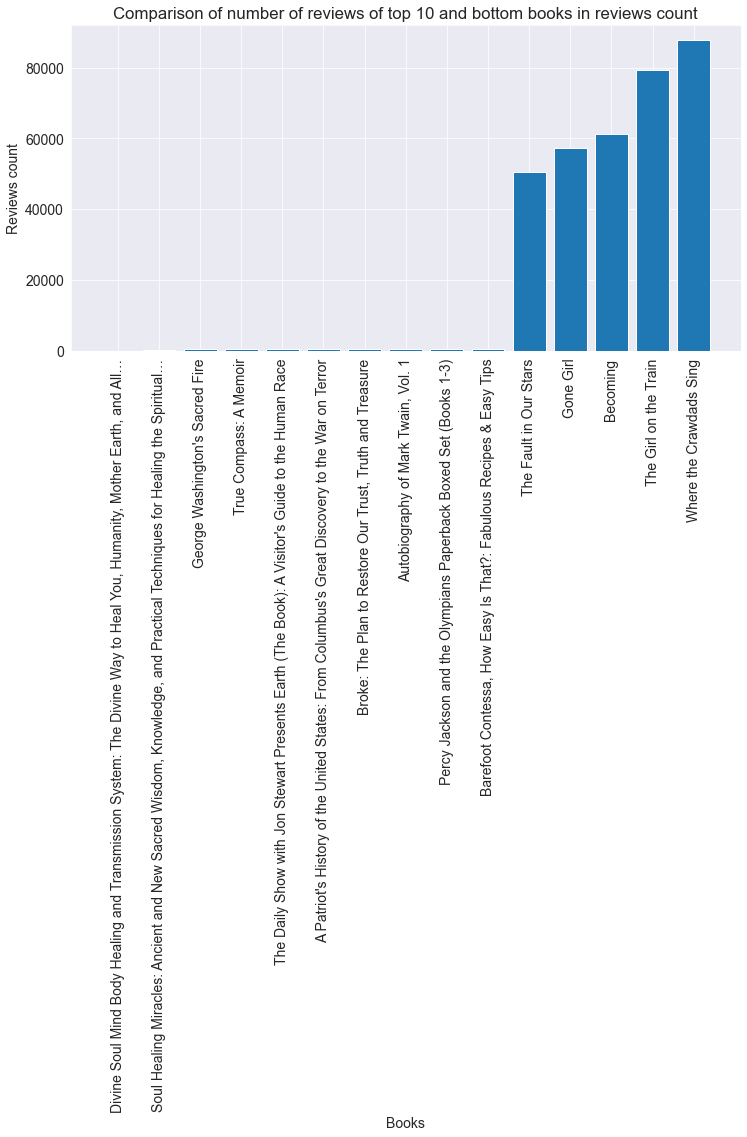

In [132]:
x = Compare_books_reviews_df.Name
y = Compare_books_reviews_df['Reviews']
plt.figure(figsize=(12, 6))
plt.title("Comparison of number of reviews of top 10 and bottom books in reviews count")
plt.xticks(rotation=90)
plt.xlabel('Books')
plt.ylabel('Reviews count')
plt.bar(x,y);

We can conclude following things:
1. There are more different books in the lowest reviewed list than the most reviewed books list.
2. Lowest reviewed list is dominated by non fiction genre, books of non fiction genre occupied 8 out 10 position in this list.
3. Highest reviewed list is dominated by fiction genre, books of fiction genre occupied 8 out 10 position in this list.
4. There is huge gap between number of reviews of top 10 books and bottom 10 books.

#### Q8: How many authors were featured in the amazon bestseller list and analyze their work featured in this list (e.g. based on user ratings, etc.) ?

In [98]:
## Total number of authors who were present in the amazon's bestseller list from year 2009 to 2019

books_df.Author.nunique()

248

In [99]:
Author_mean_df = books_df1.groupby('Author')[['Name', 'User Rating', 'Reviews', 'Price', 'Genre']].mean()

In [100]:
Author_user_high_df = Author_mean_df.sort_values("User Rating").tail(10)

In [101]:
Author_user_high_df

,User Rating,Reviews,Price
Author,,,
Rush Limbaugh,4.9,5493.0,12.0
Bill Martin Jr.,4.9,14344.0,5.0
Alice Schertle,4.9,1884.0,5.0
Chip Gaines,4.9,7861.0,5.0
Sherri Duskey Rinker,4.9,7038.0,7.0
Lin-Manuel Miranda,4.9,5867.0,54.0
Patrick Thorpe,4.9,5396.0,20.0
Nathan W. Pyle,4.9,9382.0,6.0
Pete Souza,4.9,3192.0,22.0


In [102]:
Author_user_low_df = Author_mean_df.sort_values("User Rating").head(10)

In [103]:
Author_user_low_df

,User Rating,Reviews,Price
Author,,,
Donna Tartt,3.9,33844.000000,20.000000
Gillian Flynn,4.0,57271.000000,9.666667
Muriel Barbery,4.0,1859.000000,11.000000
Gallup,4.0,5069.000000,17.000000
Ian K. Smith M.D.,4.1,2272.000000,6.000000
Paula Hawkins,4.1,79446.000000,12.500000
Chris Cleave,4.1,1467.000000,10.000000
Pierre Dukan,4.1,2023.000000,15.000000
Dan Brown,4.2,19100.666667,15.333333


In [125]:
Compare_user_rating_df = pd.concat([Author_user_high_df,Author_user_low_df])

In [126]:
Compare_user_rating_df

,User Rating,Reviews,Price
Author,,,
Rush Limbaugh,4.9,5493.000000,12.000000
Bill Martin Jr.,4.9,14344.000000,5.000000
Alice Schertle,4.9,1884.000000,5.000000
Chip Gaines,4.9,7861.000000,5.000000
Sherri Duskey Rinker,4.9,7038.000000,7.000000
Lin-Manuel Miranda,4.9,5867.000000,54.000000
Patrick Thorpe,4.9,5396.000000,20.000000
Nathan W. Pyle,4.9,9382.000000,6.000000
Pete Souza,4.9,3192.000000,22.000000


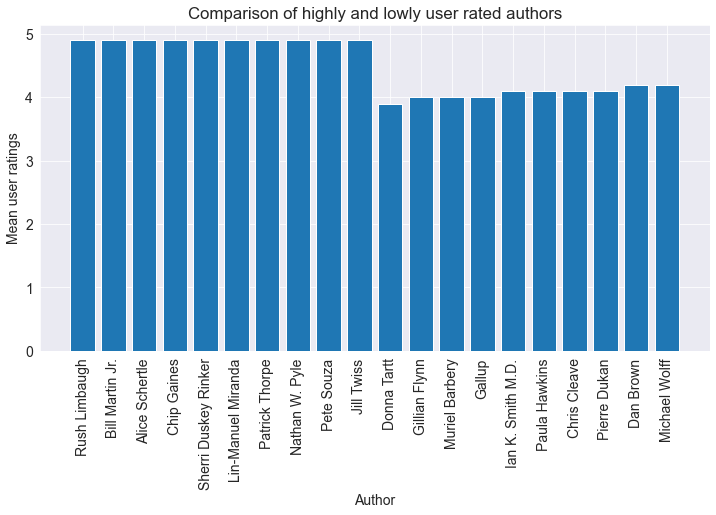

In [122]:
x = Compare_user_rating_df.index
y = Compare_user_rating_df['User Rating']
plt.figure(figsize=(12, 6))
plt.title("Comparison of highly and lowly user rated authors")
plt.xticks(rotation=90)
plt.xlabel('Author')
plt.ylabel('Mean user ratings')
plt.bar(x,y);

In [104]:
Author_sum_df = books_df1.groupby('Author')[['Name', 'User Rating', 'Reviews', 'Price', 'Genre']].sum()

In [105]:
Author_reviews_high_df = Author_sum_df.sort_values("Reviews").tail(10)

In [106]:
Author_reviews_high_df

,User Rating,Reviews,Price
Author,,,
Don Miguel Ruiz,28.2,139848,36
Gary Chapman,52.1,145958,189
Harper Lee,27.6,146152,46
Laura Hillenbrand,24.0,148365,77
Paula Hawkins,8.2,158892,25
Gillian Flynn,12.0,171813,29
Dr. Seuss,43.9,176545,78
E L James,25.4,178011,92
John Green,23.3,210419,53


In [107]:
Author_reviews_low_df = Author_sum_df.sort_values("Reviews").head(10)

In [108]:
Author_reviews_low_df

,User Rating,Reviews,Price
Author,,,
Zhi Gang Sha,9.2,257,23
Peter A. Lillback,4.5,408,20
Edward M. Kennedy,4.5,438,15
Jon Stewart,4.4,440,11
Larry Schweikart,4.6,460,2
Mark Twain,4.2,491,14
Bill Simmons,4.7,858,53
F. A. Hayek,4.6,1204,14
John Heilemann,4.4,1215,9


In [109]:
most_famous_author_df = pd.merge(Author_user_high_df, Author_reviews_high_df, how='inner', on="Author")

In [110]:
most_famous_author_df

,User Rating_x,Reviews_x,Price_x,User Rating_y,Reviews_y,Price_y
Author,,,,,,


In [114]:
Compare_reviews_df = pd.concat([Author_reviews_high_df,Author_reviews_low_df])

In [115]:
Compare_reviews_df

,User Rating,Reviews,Price
Author,,,
Don Miguel Ruiz,28.2,139848,36
Gary Chapman,52.1,145958,189
Harper Lee,27.6,146152,46
Laura Hillenbrand,24.0,148365,77
Paula Hawkins,8.2,158892,25
Gillian Flynn,12.0,171813,29
Dr. Seuss,43.9,176545,78
E L James,25.4,178011,92
John Green,23.3,210419,53


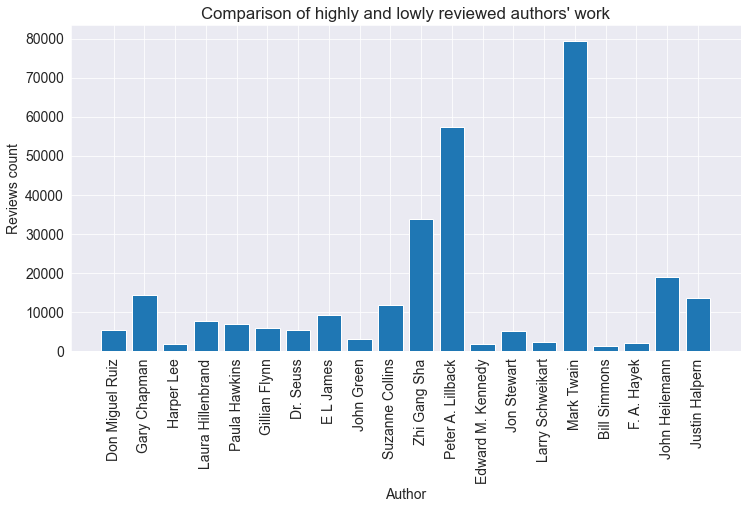

In [116]:
x = Compare_reviews_df.index
y = Compare_user_rating_df['Reviews']
plt.figure(figsize=(12, 6))
plt.title("Comparison of highly and lowly reviewed authors' work")
plt.xticks(rotation=90)
plt.xlabel('Author')
plt.ylabel('Reviews count')
plt.bar(x,y);

We can conclude following points from this question:
1. In amazon bestseller list from year 2009 to 2019 work of 248 different authors was featured.
2. Even the author with the lowest mean user rating has a score of 3.9 which shows that books featured in this list are of high quality.
3. Authors whose books are featured in top 10 of the user rating list has same mean user rating 4.9.
4. Unlike the user ratings where was not much difference in mean user ratings of top 10 and bottom 10 authors, in case of count of reviews there is huge gap between top 10 and bottom 10 authors.
5. There is not a single author whose work got featured in both highest rated mean user rating list and the most reviewed list.

Let us save and upload our work to Jovian before continuing.

In [133]:
import jovian

In [134]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ankitsavita144/amazon-top-50-bestselling-books-2009-2019" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/ankitsavita144/amazon-top-50-bestselling-books-2009-2019


'https://jovian.ai/ankitsavita144/amazon-top-50-bestselling-books-2009-2019'

## Inferences and Conclusion

We've drawn many inferences from the survey. Here's a summary of a few of them:

- In the bestseller list of amazon from year 2009 to 2019 most the books were repeated over the years. From the 550 entries in the list there were only 351 different books in this list.

- Reason of upper mentioned point can be that readers like these books so much that these books were purchased by many people even in different years.

- There were roughly same number of books for each genre but genre wise non fiction dominate this list, around 56.4% books featured in this list was of non fiction genre.

- Most expensive book in the whole dataset is  Diagnostic and Statistical Manual of Mental Disorder and it's price is 105 dollars.

- Most of the authors' books were featured multiple times in this list , ie in amazon bestseller list from year 2009 to 2019 work of 248 different authors was featured.

- Number of reviews increased at a huge pace after year 2012. Reason for this may be more people started buying books from amazon in USA, more people started using internet.

-  Although fiction books are featured less in this list but sum of reviews on them is much higher than that of non fiction  ones. There can be various reasons for it:
      a. Sales of fiction books can be more than that of non fiction books.
      b. Readers of fiction books can be more active in giving reviews than the readers of non fiction books.
      c. Mean price of fiction books is less than mean price of non fiction ones. This makes them more affordable and hence more people buy fiction books.
         

In [119]:
import jovian

In [136]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ankitsavita144/amazon-top-50-bestselling-books-2009-2019" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/ankitsavita144/amazon-top-50-bestselling-books-2009-2019


'https://jovian.ai/ankitsavita144/amazon-top-50-bestselling-books-2009-2019'

## References and Future Work

- Further in this project we will try to draw some interesting insights with amazon sales data for these books. This will unfold many things and may reveal some interesting points like book with the lowest user rating makes highest sales.

- The dataset used in this project was downloaded from : https://www.kaggle.com/datasets?fileType=csv

- I have taken references from many other websites and projects present in jovian website while working in this project. Some of those websites are the following:
  1. geeksforgeeks.org
  2. w3schools.com
  3. stackoverflow.com
  4. jovian.ai
  
- I have taken help from "usinflationcalculator.com" to calculate inflated price of books.

In [137]:
import jovian

In [138]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ankitsavita144/amazon-top-50-bestselling-books-2009-2019" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/ankitsavita144/amazon-top-50-bestselling-books-2009-2019


'https://jovian.ai/ankitsavita144/amazon-top-50-bestselling-books-2009-2019'

In [140]:
jovian.submit(assignment="zero-to-pandas-project")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ankitsavita144/amazon-top-50-bestselling-books-2009-2019" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/ankitsavita144/amazon-top-50-bestselling-books-2009-2019
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
